#  **BioPolymer2D** class
BioPolymer2D is an object-oriented class based on MDAnalysis that is part of the `twodanalysis` toolkit package to analyze adsorption mechanisms of biopolymer into 2-dimentional surfaces. This toolkit is initialized with an MDAnalysis Universe or Atom Group, enabling the use of Universes and AtomGroups that have been previously initialized to be used for built-in MDAnalysis methods.

Functions that analyze flexibility (Polar histograms and 2D-density contours) make use of two important parameters to determine adsorbed frames to be analyzed:
* `zlim`: Sets the minimal distance (in $\mathring{\text A}$) residues need to have to the surface to be considered absorbed, e.i filters frames where $\langle z_i\rangle_{\text{residues}}$ > `zlim`.
* `Nframes` : Sets the number of frames to consider from the set of  $\langle z_i\rangle_{\text{residues}}$ < `zlim` frames. If `Nframes=None`, it considers all frames.

In this class, we propose four analysis functions that will focus on retrieving detailed information on the adsorption mechanisms of biopolymers onto 2-dimensional surfaces: 
1. **Polar Histogram analysis**:
Polar histogram of residues from the center of mass of a given selection of atoms. This type of analysis gives detailed information on the distribution of the positions of the residues over the simulations. These histograms can be interpreted as probability distribution histograms (PDF) of the residues, and therefore the width of the histogram is an indicative of the flexiblity of the residues. This analysis has been previously used in Supplementary information of [[1](https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460)].

2. **2D-density contour analysis**:
Using the `seaborn.kde_plot` function, it makes a contour plot of selected residues using only a set of adsorpbed to the surface frames of the simulation, and is able to compute the areas of a given contour level. Similarly to the polar plot, the area of the contour plots can give information on the flexibility of the residue, but also give insight on the the specificity of the interactions depending on the chosen level of the contour plot that is selected to compute the area. 
Analogue to the Polar histograms, these KDE position density contours are 2-dimentional probability distribution histograms. Therefore, by measuring the area of diferent contour levels you can measure diferent properties if the interaction, for instance,
*  By computing th area of the lower contour levels, you can sample all the available spaces states in the X and Y axis which is an indicative of how flexible ("entropic") is the system, i.e., higher area values at the lowest contour levels shows more flexibility. 

* On the other hand, by computng the area of higher contour level, you can sample the available space state of the peak of the distribution, giving insight on the specificity of the interaction, i.e, lower area values at the highest contour levels show more specificity. 

3. **Parallel and perpendicular radii of gyration**:
Computes the standard 3D ($R_{g}$), parallel ($R_{g\parallel}$) and perpendicular ($R_{g\perp}$) radii of gyration.

$$R_{\textrm{g}}= \sqrt{ \frac{1}{m_T}\sum_{i} m_{i}\left[ (x_i-x_{\textrm{CM}})^2+(y_i-y_{\text{CM}})^2+(z_i-z_{\text{CM}})^2\right]}$$
$$R_{\textrm{g}\parallel}= \sqrt{ \frac{1}{m_T}\sum_{i} m_{i}\left[ (x_i-x_{\textrm{CM}})^2+(y_i-y_{\text{CM}})^2\right]}$$
$$R_{\textrm{g}\perp} = \sqrt{\frac{1}{m_T}\sum_{i} m_{i} (z_i-z_{\text{CM}})^2,}$$

where ${\bf R}_{\textrm{CM}}=(x_{\textrm{CM}}$, $y_{\textrm{CM}}$, $z_{\textrm{CM}})$ is the position of the center of mass, $m_{i}$ the mass of each residue and $m_T$ the total mass of the residues.

The parallel and perpendicular radii of gyration gives structural information during the adsorption,

* $R_{g\parallel}$: Gives information on how the biopolymer is expanded by the sides (parallel to the surface). 

* $R_{g\perp}$ : Gives information on how the biopolymer is streched or flattened.

and, if compared to native environment, it can give insight on the deformation of the biopolymer due to the surface presence, as was done in [[1](https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460)], where we compare these values for the open SARS-CoV2 RBD onto polarizable bilayers to its native ACE2 enzyme.

Note that $R_{g\parallel}$ and $R_{g\perp}$ are not necesarilly correlated since secondary strucutures as biomolecules have cavities. This is specilly true for proteins.

When these values are computed, there is the posibility to generate a plot indicating $\langle R_{g\perp}^2 \rangle /\langle R_{g\parallel}^2 \rangle$ ratio, which is relevant in polymer theory [[2](https://pubs.acs.org/doi/10.1021/acsomega.1c04774), [3](https://pubs.aip.org/aip/jcp/article-abstract/144/17/174902/194646/Semiflexible-polymers-under-good-solvent?redirectedFrom=fulltext), [4](https://pubs.aip.org/aip/jcp/article-abstract/152/6/064901/307769/How-does-stiffness-of-polymer-chains-affect-their?redirectedFrom=fulltext)] when studying polymer adsorption, and a $R_{g\perp}$ vs $R_{g\parallel}$ plot similar to Figure 1.

<div style="text-align: center;">
    <img src="images/TOC12_Final.png" width="600" alt="FIGURE 1" />
    <p><b>Figure 1:</b> Figure extracted from <a href="https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460" target="_blank">[1]</a> 
    It shows a plot similar to the one generated by the toolbox, with some graphical representation of the 
    \( R_{g\parallel} \) and \( R_{g\perp} \) .</p>
</div>

4. **H-bonds per residues**:

In order to further understand the present interactions between surfaces and the biopolymer, this tool computes the Hbonds of each residue in a selection of residues during the simulation. As an output you will have a table sorted from the residues with most to the least Hbonds, and there is the posibitly to have a plot show the center of mass of the residues from a bottom perspective. This tool uses MDAnalysis protocol to compute Hbonds which is a geometric approach of Hbond computation, and uses MDAnalysis default parameters to compute them. 



## Instalation and previous setup

Prior starting with this tutorial, you must install the `twodanalysis` toolkit following th steps in [2Danalysis instalation guide](https://twodanalysis.readthedocs.io/en/latest/installation.) or the README.md file from the [2Danalysis Github](https://github.com/monjegroup/twod-analysis-kit). With the instalation of the toolkit, trajectories used in the tutorials will be downloaded. 

Import the `BioPolymer2D` class and the trajectories from the toolkit library, and other libraries required for the tutorial. 

# Case of study 3: Closed SARS-CoV2 RBD with glycans in highly hydrophilic surfaces with **BioPolymer2D** class

In [1]:
from twodanalysis import BioPolymer2D 
# from twodanalysis.data.files import MD_NOWATER_TPR, MD_TRAJ
import MDAnalysis as mda
import matplotlib.pyplot as plt
import pandas as pd
import nglview as nv
import os
# mpl.rcParams['figure.dpi'] = 1000

## System

In this tutorial, we will be using the BioPolymer2D class to analyze the adsorption mechanisms of a protein onto a surface. In this case, we will be using the closed SARS-CoV2 RBD with glycans, where we will be able to compare flexibility of Glycans vs flexbility of protein. It is expected glycans to be more flexible than proteins since proteins have secondary structures that reduces the degrees of freedom of the atoms, and glycans are attached to the protein merly by one covalent bond.

In Figure 2,  we can see our system that is given by the SARS-CoV2 RBD in black, the glycan in red and the polarizable bilayer (PBL) in yellow (uncomment cell below to see this image with more detail). 

<div style="text-align: center;">
    <img src="images/System.png" width="400" alt="FIGURE 2" />
    <p><b>Figure 2:</b> System that with be used for the tutorial. SARS-CoV2 RBD is shown in black, the glycan in red and the polarizable bilayer (PBL) in yellow . </p>
</div>


## Download files

Although this tutorial is designed to be adapted to work with any trajectory, it is **strongly recommended** to first follow it using *our* trajectories to gain an initial approach to the parameters you need to adjust and how to modify them for your own system.

To proceed, download our trajectories from Zenodo using the `wget` command (if needed, install it with `pip install wget` in the command line). The download may take a few minutes. A directory named `data` will be created containing the downloaded trajectories. Once the download is complete, you can comment out the cell below.

In [2]:
import wget
url_tpr = 'https://zenodo.org/records/14834110/files/wild-type.tpr'
url_xtc = 'https://zenodo.org/records/14834110/files/wild-type.xtc'
os.makedirs('data', exist_ok=True)
load_MD_NOWATER_TPR = wget.download(url_tpr,out='data/wild-type.tpr')
load_MD_TRAJ = wget.download(url_xtc,out='data/wild-type.xtc')

In [3]:
MD_NOWATER_TPR='data/wild-type.tpr'
MD_TRAJ='data/wild-type.xtc'

In [4]:
# u=mda.Universe(MD_NOWATER_TPR,MD_TRAJ)
# sel = u.select_atoms("resid 193-200 or protein")
# view=nv.show_mdanalysis(u)
# # Selection of molecules in Polariable Bilayer (PBL)
# resname_dol = u.select_atoms("resname DOL")
# # Selection of molecules in protein
# prot = u.select_atoms("protein")
# # Selection of molecules in Glycan
# glyc = u.select_atoms("resname BGLCNA AFUC BMAN AMAN")
# view.clear_representations()
# view.add_representation('surface', selection=resname_dol.atoms.indices,color='yellow',)# opacity=0.5, probeRadius=2)
# view.add_representation('cartoon', selection=prot.atoms.indices,color='black')
# view.add_representation('licorice', selection=glyc.atoms.indices,color='red', radius=0.5)

# view.layout.width = '500px'  # Set the width
# view.layout.height = '400px'  # Set the height

# view.center()
# # Display the view
# view

Although, the whole trajectory can be seen in the latter output, it is not recommended since reproduction will be slow. In such case you want to see the whole trajectory, uncomment cell below.

In [5]:

### Uncomment if you want to see the trajectory
# t = nv.MDAnalysisTrajectory(u.select_atoms('protein or resname DOL or resname AFUC BMAN AMAN BGLCNA'))
# w = nv.NGLWidget(t)
# w

## Initializing object

We first initialize a Universe or AtomGroup.

In [6]:
u=mda.Universe(MD_NOWATER_TPR,MD_TRAJ)
sel = u.select_atoms("resid 193-200 or protein")

Now, that we have initialized a Universe or an AtomGroup, we will initialize our BioPolymer2D object. This can be initialized either with a MDAnalysis AtomGroup or a Universe. The class has two main attributes, universe and atom_group. If initialized with a Universe, the attribute atom_group will be the AtomGroup of the whole system. For instance:

In [7]:
ag_biopol = BioPolymer2D(u)
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24555
  N residues: 848
  N segments: 2
  Time : 0.0-300.0ns dt=0.2ns
  N frames : 1500
=== SELECTION INFO ===
  N selected atoms: 24555
  N selected residues: 848
  N selected segments: 2


Note that Selection info has the same number of atoms and residues that Universe info.

If the class is initialized with a selection, we will get different selection with the Universe:

In [8]:
ag_biopol = BioPolymer2D(sel)
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24555
  N residues: 848
  N segments: 2
  Time : 0.0-300.0ns dt=0.2ns
  N frames : 1500
=== SELECTION INFO ===
  N selected atoms: 3171
  N selected residues: 200
  N selected segments: 1


Whether you initialize with a Universe or AtomGroup, you can set your BioPolymer to be a subset residues of these by using the `biopol_selection` input

In [9]:
ag_biopol = BioPolymer2D(sel,biopol_selection='protein')
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24555
  N residues: 848
  N segments: 2
  Time : 0.0-300.0ns dt=0.2ns
  N frames : 1500
=== SELECTION INFO ===
  N selected atoms: 2979
  N selected residues: 192
  N selected segments: 1


In the previous cases, our object has no information on the positioning of  **interface** of the surface. This can be set by manually setting a 4 element numpy array [0,x,y,z], for instance,

In [10]:
ag_biopol.surf_pos = [0,41,36,26]

or using the `surf_selection` input at the intialization of the object to select the *interfatial* atoms of the surface,

In [11]:
ag_biopol = BioPolymer2D(sel,surf_selection='resname DOL and name O1 and prop z > 16',biopol_selection='protein',)
ag_biopol.INFO()

 Mean position of the surface is [149.9         41.75467755  37.01109771  26.80062946]
=== UNIVERSE INFO ===
  N atoms: 24555
  N residues: 848
  N segments: 2
  Time : 0.0-300.0ns dt=0.2ns
  N frames : 1500
=== SELECTION INFO ===
  N selected atoms: 2979
  N selected residues: 192
  N selected segments: 1


 ***This is the most recommended approach.***

Note that only oxygen atoms with a z-position greater than 16 Å on the surface ('resname DOL') are considered as interfacial atoms, rather than all surface residues. Using this approach, the average z-position of the interfacial atoms over time is taken as the position of the surface

Additionally, when initializing the object, you can choose to use only a subset of the trajectory by adjusting the `start`, `step`, and/or `end` parameters. These three values can be specified either as times (in nanoseconds) or as frame indices, depending on the `by_frame` parameter. If `by_frame` is set to `True`, values are interpreted as frames; if set to `False`, they are interpreted as time. By default, selection is done by frames.

In [12]:
ag_biopol = BioPolymer2D(sel,surf_selection='resname DOL and name O1 and prop z > 16', start=100,step=0.4,end=300,by_frames=False)
ag_biopol.INFO()

 Mean position of the surface is [199.8         41.76076476  37.01363973  26.79568924]
=== UNIVERSE INFO ===
  N atoms: 24555
  N residues: 848
  N segments: 2
  Time : 100-300ns dt=0.4ns
  N frames : 500
=== SELECTION INFO ===
  N selected atoms: 3171
  N selected residues: 200
  N selected segments: 1


In [13]:
ag_biopol = BioPolymer2D(sel,start=1000,step=2,end=1500,by_frames=True)
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24555
  N residues: 848
  N segments: 2
  Time : 200.0-300.0ns dt=0.4ns
  N frames : 250
=== SELECTION INFO ===
  N selected atoms: 3171
  N selected residues: 200
  N selected segments: 1


In [14]:
print(ag_biopol.startT,ag_biopol.stepT,ag_biopol.endT)
print(ag_biopol.startF,ag_biopol.stepF,ag_biopol.endF)

200.0 0.4 300.0
1000 2 1500


This can be changed 'on-the-fly' by overloading the attributes `startT`, `stepT`, and/or `endT` for changes in the time, or `startF`, `stepF` and/or `endF` for changes in frames, as follows:

In [15]:
ag_biopol.startF=500
ag_biopol.endF=1000
ag_biopol.stepF=4
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24555
  N residues: 848
  N segments: 2
  Time : 100.0-200.0ns dt=0.8ns
  N frames : 125
=== SELECTION INFO ===
  N selected atoms: 3171
  N selected residues: 200
  N selected segments: 1


In [16]:
ag_biopol.startT=100
ag_biopol.endT=200
ag_biopol.stepT=4
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24555
  N residues: 848
  N segments: 2
  Time : 100-200ns dt=4ns
  N frames : 25
=== SELECTION INFO ===
  N selected atoms: 3171
  N selected residues: 200
  N selected segments: 1


**WARNING**: If `stepT` is smaller than initial Universe, you will have problems during the analysis calculations. 

If we now compute the positions of the residues with:

In [17]:
ag_biopol.getPositions()
print(ag_biopol.startF,ag_biopol.endF)
ag_biopol.pos.shape

500 1000


(25, 200, 4)

We get a numpy array of size (`ag_biopol.endF` -`ag_biopol.startF`, `Nresidues` ,`pos` \<t,x,y,z\> ). If we want to compute the positions of atoms instead of the center of mass of residues, you can get use:

In [18]:
ag_biopol.getPositions(pos_type='all')
print(ag_biopol.startF,ag_biopol.endF)
ag_biopol.pos.shape

500 1000


(25, 3171, 4)

Note that the `getPositions` calculation is typically one of the first steps performed after initializing the object. However, it is not run by default during initialization to allow customization of this calculation, as mentioned earlier. This also provides the flexibility to manually assign positions to the object if they were computed beforehand—although this must be done with care to ensure consistency across the other attributes of the object.

The`getPositions` method by default will store the positions inplace in the object attribute `self.pos`:

In [19]:

ag_biopol = BioPolymer2D(sel)
ag_biopol.system_name='WT PBL1'
ag_biopol.getPositions()
print(ag_biopol.startF,ag_biopol.endF)
ag_biopol.pos.shape

0 1500


(1500, 200, 4)

The `system_name` attribute is simply used to assign a name to the system. This can be useful for generating legends and titles in analysis plots, especially when comparing multiple systems.

If you prefer not to store the computed positions as an attribute of the object, you can set `inplace=False`. This allows you to use the function to calculate the positions of any selection within the universe without overwriting the attribute `self.pos` of the object. For instance:

In [20]:
glycan_extreme_residues_pos=ag_biopol.getPositions(select='resid 198 200', inplace=False)
print(glycan_extreme_residues_pos.shape, "residues computes with inplace=False")
print(ag_biopol.pos.shape, "residues computes with inplace=True")

(1500, 2, 4) residues computes with inplace=False
(1500, 200, 4) residues computes with inplace=True


to compute the COM of the selected residues, or to compute the positions of all atoms:

In [21]:
all_atoms_pos=ag_biopol.getPositions(select='resid 198 200', inplace=False)
print(all_atoms_pos.shape, "residues computes with inplace=False")
print(ag_biopol.pos.shape, "residues computes with inplace=True")

(1500, 2, 4) residues computes with inplace=False
(1500, 200, 4) residues computes with inplace=True


**WARNING**: If `inplace` is not set explicitly set to `False`, `ag_biopol.pos` attribute will be overwritten and variables will be `None` since `inplace=True` by default,

In [22]:
glycan_extreme_residues_pos=ag_biopol.getPositions(select='resname BGLCNA AFUC BMAN AMAN')
print(ag_biopol.pos.shape)
print(glycan_extreme_residues_pos)

(1500, 8, 4)
None


## Polar Analysis 

Now we will reinitialize our object and compute the positions of the selection to compute the **polar histograms of residues** by using our previously selected residues (all residues in the protein+glycan), and we will call the system "Omicron PBL1", since we are working with the Omicron variant of the SARS-COV2 RBD with a PBL of polarity 1 (completly hydrophilic).

In [23]:

ag_biopol = BioPolymer2D(sel,surf_selection='resname DOL and name O1 and prop z > 16')
ag_biopol.system_name='WT PBL1'
ag_biopol.getPositions()
print(ag_biopol.startF,ag_biopol.endF)
ag_biopol.pos.shape

 Mean position of the surface is [149.9         41.75467755  37.01109771  26.80062946]
0 1500


(1500, 200, 4)

Now that we have computed the positions, we can start our analysis using the `PolarAnalysis` method. The Polar analysis method will take the object's selection to set the center of the polar histogram, and plot the histograms of the selected residues in `select_res` parameter. In the following case, we will take seven protein residues in the contact region and compare their histogram width with two glycan residues (198-BGLCNA and 200-BGLCNA). Reference of the positioning of these residues below with residue colors corresponding with the Polar histograms and the 2D-position density contours (next section).

**Note:** Positioning of residues in Polar histograms (and 2D-density contours) correspond to a *top view* of the structure.   

In [24]:

view=nv.show_mdanalysis(u)
# Selection of molecules in Polariable Bilayer (PBL)
# resname_dol = u.select_atoms("resname DOL")
# Selection of molecules in protein
prot = u.select_atoms("protein")
# Selection of molecules in Glycan
glyc = u.select_atoms("resname BGLCNA AFUC BMAN AMAN")
# Contact=u.select_atoms('resid 4-15 or resid 34-45 or resid 104-117 or resid 170-176')
view.clear_representations()
# view.add_representation('surface', selection=resname_dol.atoms.indices,color='yellow', opacity=0.9, probeRadius=2)
view.add_representation('cartoon', selection=prot.atoms.indices,color='darkgray',opacity=0.3, smoothness=30,smoothSheet=True)
view.add_representation('licorice', selection=glyc.atoms.indices,color='darkgray', radius=0.5,opacity=0.3)

residues=[8, 12,40,45,111,115,173,198,200]
colors=['blue', 'orange', 'lightgreen', 'red', 'purple','brown', 'pink','gray','darkgreen']
for c,r in zip(colors,residues):
    res = u.select_atoms(f"resid {r} and (name CA or name C5)")
    view.add_representation('ball+stick', selection=res.atoms.indices,color=c, radiusScale=5)

view.layout.width = '500px'  # Set the width
view.layout.height = '400px'  # Set the height

view.center()
# Display the view
view

NGLWidget(layout=Layout(height='400px', width='500px'), max_frame=1500)

Computing Polar Analysis from frame 0 (t=0.0ns) to 1500 (t=300.0ns) 
<ResidueGroup [<Residue GLY, 8>, <Residue ASN, 12>, <Residue SER, 40>, <Residue THR, 45>, <Residue ASP, 111>, <Residue GLY, 115>, <Residue GLY, 173>, <Residue BGLCNA, 198>, <Residue BGLCNA, 200>]>
(1500, 9, 4)
[149.9         43.6652712   34.95858545  28.61287645] pos mean
[149.9          0.74044475  -1.88835007  28.61287645] pos centered
(1500,)
There are 1034  frames < 15 A in Z
Taking 1000 closest frames to surface...
(1000, 9, 4)
(9, 4) MeanPos


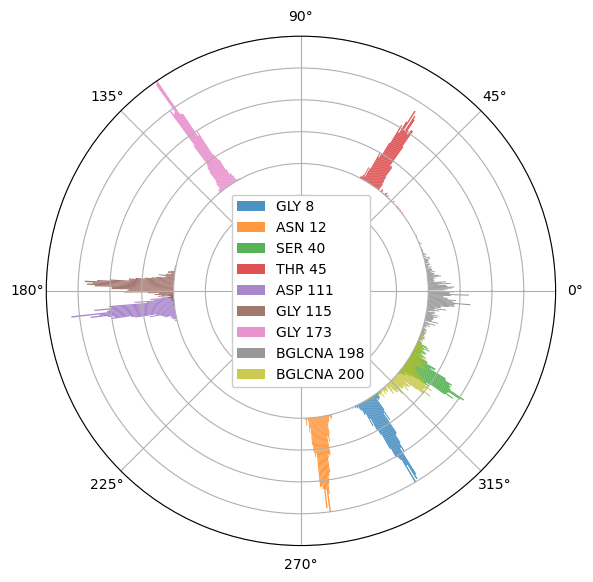

In [25]:
select_res='resid 198 200 12 8 40 45 111 115 173'
zlim=15
Nframes=1000
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'polar'}, figsize=(6, 6))
hist_arr,pos_hist=ag_biopol.PolarAnalysis(select_res,Nframes=Nframes,ax=ax, #sort=[1,2,3,4,5,6,7,8,0],
                                            zlim=zlim,control_plots=False,plot=True)
ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5),framealpha=1,)# fontsize=23)
# ax.tick_params(axis='x', pad=20,labelsize=25)  # Adjust angular ticks (theta axis)
plt.show()

At first sight, we can notice that glycan residues 198 and 200 show an increase of width respect to protein residues, as was expected. 

## Residue 2D-position-density contour plots

In general, for the contour analysis, we will want to consider only residues that are in contact with the surface. For this reason, we will define a new object with only residues in the contact region, using the same surface interface selection.


In [26]:
sel_in_Contact=u.select_atoms('resid 4-15 or resid 34-45 or resid 104-117 or resid 170-176')
Contact_region = BioPolymer2D(sel_in_Contact, surf_selection='resname DOL and name O1 and prop z > 16')
Contact_region.system_name='Contact region'# (omicron RBD)'
Contact_region.getPositions()
print(Contact_region.startF,Contact_region.endF)
print(Contact_region.pos.mean(axis=(0,1)))

 Mean position of the surface is [149.9         41.75467755  37.01109771  26.80062946]
0 1500
[149.9         41.4956816   35.98045715  31.36114157]


We compute the 2D-position density contours using `getKDEAnalysis` with the  same `zlim` and `Nframes` values as ther Polar Histograms for consistency. It will be stored in `kde_analysis.kdeanalysis.kde`.

In [27]:
paths=Contact_region.getKDEAnalysis(15,Nframes=Nframes,)
print(Contact_region.kdeanalysis.kde)

(1500,)
There are 1302  frames < 15 A in Z
Taking 1000 closest frames to surface...
(1000, 45, 4)
(45000, 4)
There are 10 levels in the KDE.
Axes(0.125,0.11;0.775x0.77)


 Then, we will compute the contour plots of multiple residues using the `KDEAnalysisSelection` method to compute the contour paths of all the residues. Before this, we use `plotPathsInLevel` to plot the paths of contour level 0 (the outermost level) as a reference of the position of our selection `select_res`.

 For our analysis, we will consider absorbed frames only the frames where the minimal distance between the residues in our selection and surface is lower than 15 $\AA$, using the `zlim` parameter, and will be considering the 1000 frames closest to the surface from that set of frames. 
 
 **NOTE**: By setting `Nframes=None`, we can consider *all* the frames with z-position lower than `zlim`. This can be usefull if not comparring results of different trjectories, and want the most statistics posible of the adsorption.

[149.9         43.6652712   34.95858545  28.61287645]
(1500,)
There are 1034  frames < 15 A in Z
Taking 1000 closest frames to surface...
(1000, 9, 4)


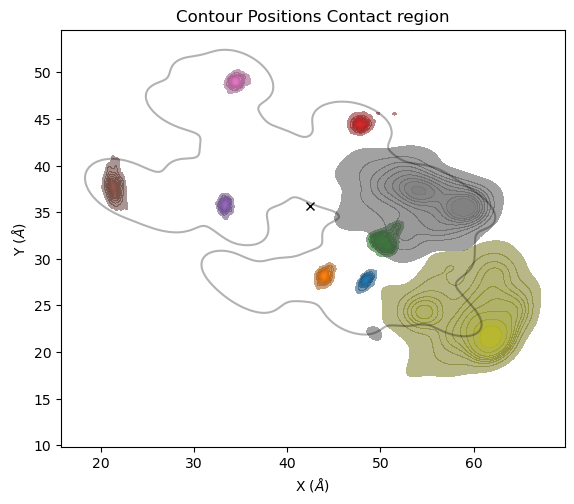

In [28]:
fig, ax = plt.subplots(figsize=(6.5,6.5))
Contact_region.plotPathsInLevel(paths,0,show=False,ax=ax)
all_residues_paths,residues_in_contour=Contact_region.KDEAnalysisSelection('resid 198 200 12 8 40 45 111 115 173',
                                                                           zlim=15,Nframes=Nframes,show=False,legend=False,ax=ax)
plt.show()


It can be noted, once again, that area of the glycans residues are more larger that proteic residues. 

In order to have a more quantitative analysis, now that the KDE contour paths of the residues are computed, we can procede to  calculate their areas using `getAreas` method for each residue. As follows, we can make a table with the total area of the outermost contour level (level 0) for each residue .


In [29]:
data=[]
for p in range(len(all_residues_paths)):
    areas=BioPolymer2D.getAreas(all_residues_paths[p],0,getTotal=True)
    data.append([residues_in_contour.residues[p].resid,residues_in_contour.residues[p].resname,areas])
df=pd.DataFrame(data=data, columns=["ResIDs", "Resnames", "Area (angs^2)"])
df

Area of the outline 0: 3.740307185107504
Area of the outline 1: -1.991999745583649
Area of the outline 0: 4.620303231315214
Area of the outline 1: -2.7663982163412344
Area of the outline 0: 9.68455759411647
Area of the outline 1: -6.883740881110983
Area of the outline 0: 5.638895098670923
Area of the outline 1: -3.0266557680331747
Area of the outline 2: 0.07962330483141655
Area of the outline 3: 0.05619945023684925
Area of the outline 0: 3.7592758090387015
Area of the outline 1: -2.5703525438710804
Area of the outline 0: 11.47123721222759
Area of the outline 1: -6.926612214159373
Area of the outline 0: 4.589064442938369
Area of the outline 1: -3.234772548738335
Area of the outline 0: 1.7392934994016755
Area of the outline 1: 163.43389930111775
Area of the outline 2: -99.22017837970506
Area of the outline 0: 182.28323384030622
Area of the outline 1: -119.17688582246377


,ResIDs,Resnames,Area (angs^2)
0,8,GLY,1.748307
1,12,ASN,1.853905
2,40,SER,2.800817
3,45,THR,2.748062
4,111,ASP,1.188923
5,115,GLY,4.544625
6,173,GLY,1.354292
7,198,BGLCNA,65.953014
8,200,BGLCNA,63.106348


These results can quantitatively confirme that KDE contour plots of the glycans have a larger area respect to the proteic residues, confirming that the glycan are indeed more flexible than the protein.

## Parallel and perpendicular radii of gyration

Now, that we have seen the flexibility of the protein and glycans, we would like to have some insights of the deformation of the protein during the adsorption. To this matter, we compute the parallel and perpendicular radii of gyration over the contact region and the glycan. We initialize the glycan object.

In [30]:
sel_glyc=u.select_atoms("resname AFUC BMAN AMAN BGLCNA")
glycan=BioPolymer2D(sel_glyc)
glycan.getPositions()
glycan.surf_pos=Contact_region.surf_pos
glycan.pos[:,:,3]=glycan.pos[:,:,3]-glycan.surf_pos[2]
glycan.system_name="Glycan"

We compute the radii of gyration. With `plot=True` we can see the trajectory of the Rgs over time.

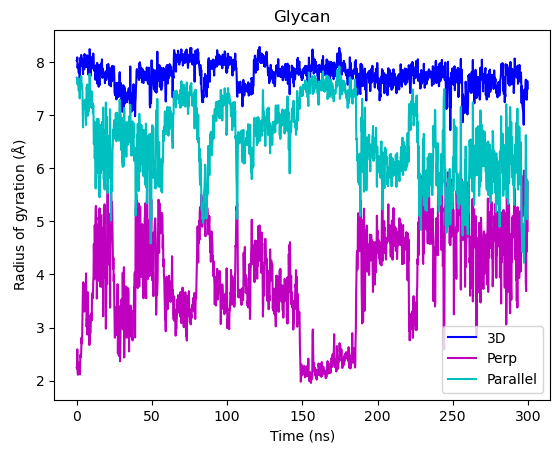

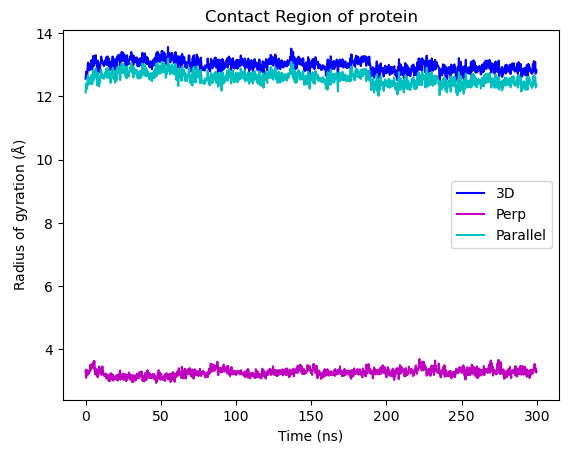

In [31]:

rgs_glycan=glycan.getRgs2D(plot=True)
plt.title("Glycan")
plt.show()
rgs=Contact_region.getRgs2D(plot=True)
plt.title("Contact Region of protein")
plt.show()



Here, we can clearly observe that the protein did not undergo significant changes in adsorption or deformation. However, the glycan shows a noticeable change in adsorption. Was this due to deformation of the glycan, or did the protein 'fly away' from the surface? As an initial hypothesis, the latter seems more likely, since the glycan reaches a globular-like radius of gyration. Nevertheless, further analysis would be needed to confirm this.  **Note that by using the standard 3D Rgs, the glycans would not notice any difference in the last nanosecond of the trajectory**.

If we don't want these plots we can set `plot=False`.

Now we wan to see how these values correlate with:

(1500, 2)
(1500, 2)


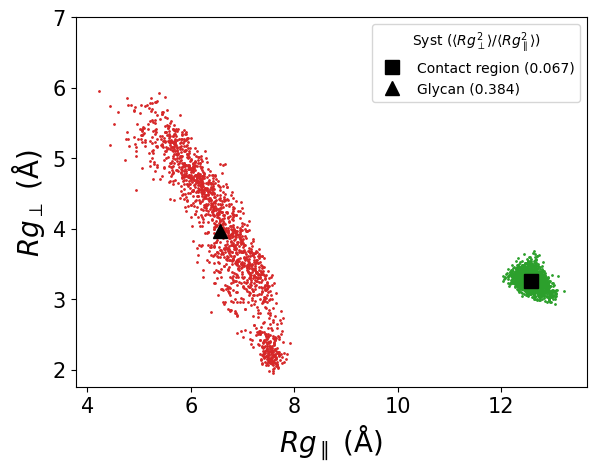

In [32]:
fig, ax = plt.subplots(figsize=(6.6,4.8))
# print(rgs.shape)
ratio=Contact_region.RgPerpvsRgsPar(rgs, 'tab:green',show=False,ax=ax,legend=False,)
ratio_glycan=glycan.RgPerpvsRgsPar(rgs_glycan,'tab:red',marker='^', show=False,ax=ax,legend=True)
#ax.legend(title=r'Syst ($\langle Rg_\perp^2\rangle /\langle Rg_\parallel^2 \rangle$)', title_fontsize=15,fontsize=15)
ax.set_xlabel(r'$Rg_\parallel$ ($\mathrm{\AA}$)',fontsize=20)
ax.set_ylabel(r'$Rg_\perp$ ($\mathrm{\AA}$)',fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_yticks(range(2,8))
plt.show()

The figure presented here was generated using the `RgPerpvsRgsPar` method from our class. Specifically, it shows a single plot comparing two objects: the glycan and the protein's contact region. In the plot, each colored dot (set by the `color` parameter) represents data from an individual frame, while the larger symbols (defined by the `marker` parameter) indicate the mean values of $R_{g\perp}$ and $R_{g\parallel}$.

We observe that, for some frames around $R_{g\perp} \approx 5.5 \AA$, the values of $R_{g\perp}$ and $R_{g\parallel}$ are approximately equal. This suggests that the glycan may have undergone desorption, transitioning from a 2D configuration to a more 3-dimensional one. In contrast, the protein's contact region shows minimal variation, highlighting its limited flexibility.

Additionally, the plot includes the value of $\langle R_{g\perp}^2 \rangle/\langle R_{g\parallel}^2 \rangle$ in the legend—this value is also returned by the `RgPerpvsRgsPar` method.

In [33]:
print(ratio)
print(ratio_glycan)

0.06738001161593517
0.38390763030804115


## Hydrogen bonds (H-bonds) per residues

To have some insight fo the interactions of the residues with the surface we will compute the Hydrogen Bonds of residues between:
1. Glycan and surface
2. Protein+glycan complex and surface
3. Glycan and Protein 

#### 1. Glycan with surface

We will identify the glycan residues that form the most hydrogen bonds with the surface by using the `getHbonds` method, and visualize there positioning with a reference contour plot generated usiing the `plotHbondsPerResidues` function. This function internally relies on MDAnalysis’s built-in `HydrogenBondAnalysis` method, which uses default geometric criteria to define hydrogen bonds.


The output figure from `plotHbondsPerResidues` includes a reference contour plot (which requires that the `getKDEanalysis` method has been computed beforehand) and highlights the centers of mass of the `top` glycan residues with the most hydrogen bonds. These are shown in color, with a surrounding circle whose size reflects the residue with the highest percentage of hydrogen bond occurrences over the trajectory. The exact percentage for each top residue is also indicated in the legend. The contour lines displayed can be adjusted via the `contour_lvls_to_plot` parameter. 

**NOTE:** The `update_selections` parameter overrides the parameter of the same name in MDAnalysis’s `HydrogenBondAnalysis`. In this notebook, it is set to `False` to reduce computation time, but its default is `True`, and it is recommended to use this default setting for more accurate results.

  0%|          | 0/1500 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname DOL and name O1)) or ((resname AFUC and name O2) or (resname AFUC and name O3) or (resname AFUC and name O4) or (resname AMAN and name O3) or (resname AMAN and name O4) or (resname AMAN and name O6) or (resname BGLCNA and name O) or (resname BGLCNA and name O3) or (resname BGLCNA and name O4) or (resname BGLCNA and name O6) or (resname BMAN and name O2) or (resname BMAN and name O4)).
  warnings.warn(


(1500,)
There are 1500  frames < 15 A in Z
Taking 1000 closest frames to surface...
(1000, 8, 4)
(8000, 4)
There are 10 levels in the KDE.
(3, 2332) (2332, 2) resid result
      Frame  Hydrogens  Acceptors
0         0        195        368
1         0        351        194
2         0        406        197
3         0        407        198
4         1        194        369
...     ...        ...        ...
2327   1208        387        200
2328   1209        200        405
2329   1209        388        200
2330   1210        200        405
2331   1210        387        200

[2332 rows x 3 columns]
(3, 2332) (2332, 2) resid result
      Frame  Hydrogens  Acceptors
0         0        195        368
1         0        351        194
2         0        406        197
3         0        407        198
4         1        194        369
...     ...        ...        ...
2081   1208        387        200
2082   1209        200        405
2083   1209        388        200
2084   1210        200

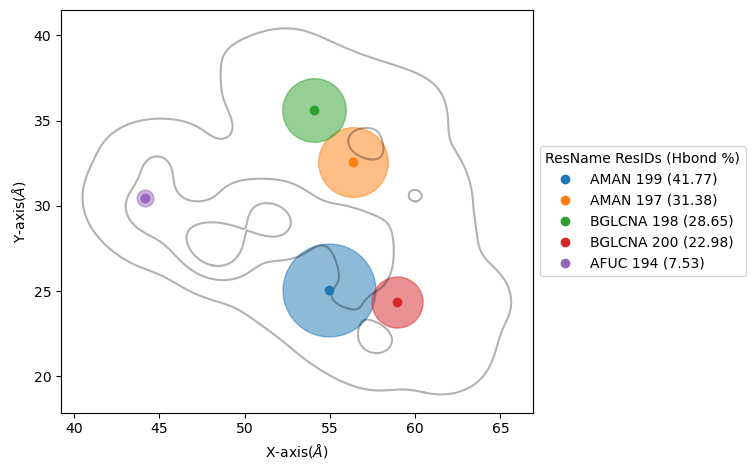

In [34]:
ag_biopol.getHbonds('resname DOL','resid 193-200', update_selections=False,trj_plot=False)

fig, ax = plt.subplots()
paths=glycan.getKDEAnalysis(zlim,Nframes)
ag_biopol.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,5,8],top=5, print_table=True,ax=ax)
plt.show()

As an output of `plotHbondsPerResidues`, we also get a table with all the residues with H-bonds with their corresponding Hbond count, and their mean center of mass position.

#### 2. Protein+glycan complex and surface

Now, we will compute the hydrogen bonds formed by the entire biopolymer (Protein + Glycan) with the surface. This time, however, we want to visualize separate referential contours for the two regions of interest—the protein and the glycan. To do this, we concatenate their respective lists of contour paths using the `+` operator. We then choose to display path 0 (the protein’s contour) and path 9 (the glycan’s first contour), keeping in mind that the glycan has only 9 contour paths, indexed from 0 to 8. In the resulting plot, the protein contour is shown in black, while the glycan contour is shown in red.

(1500,)
There are 1500  frames < 15 A in Z
Taking 1000 closest frames to surface...
(1000, 45, 4)
(45000, 4)
There are 10 levels in the KDE.
(1500,)
There are 1500  frames < 15 A in Z
Taking 1000 closest frames to surface...
(1000, 8, 4)
(8000, 4)
There are 10 levels in the KDE.


  0%|          | 0/1500 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname DOL and name O1)) or ((resname AFUC and name O2) or (resname AFUC and name O3) or (resname AFUC and name O4) or (resname ALA and name O) or (resname AMAN and name O3) or (resname AMAN and name O4) or (resname AMAN and name O6) or (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ARG and name O) or (resname ASN and name ND2) or (resname ASN and name O) or (resname ASN and name OD1) or (resname ASP and name O) or (resname ASP and name OD1) or (resname ASP and name OD2) or (resname BGLCNA and name O) or (resname BGLCNA and name O3) or (resname BGLCNA and name O4) or (resname BGLCNA and name O6) or (resname BMAN and name O2) or (resname BMAN and name O4) or (resname CYS and name O) or (resname GLN and name NE2)

(3, 2343) (2343, 2) resid result
      Frame  Hydrogens  Acceptors
0         0        109        651
1         0        109        335
2         0        195        368
3         0        351        194
4         0        406        197
...     ...        ...        ...
2338   1208        387        200
2339   1209        200        405
2340   1209        388        200
2341   1210        200        405
2342   1210        387        200

[2343 rows x 3 columns]
(3, 2343) (2343, 2) resid result
      Frame  Hydrogens  Acceptors
0         0        109        651
1         0        195        368
2         0        351        194
3         0        406        197
4         0        407        198
...     ...        ...        ...
2091   1208        387        200
2092   1209        200        405
2093   1209        388        200
2094   1210        200        405
2095   1210        387        200

[2096 rows x 3 columns]
Index([108, 193, 194, 195, 196, 197, 198, 199], dtype='int64', name=

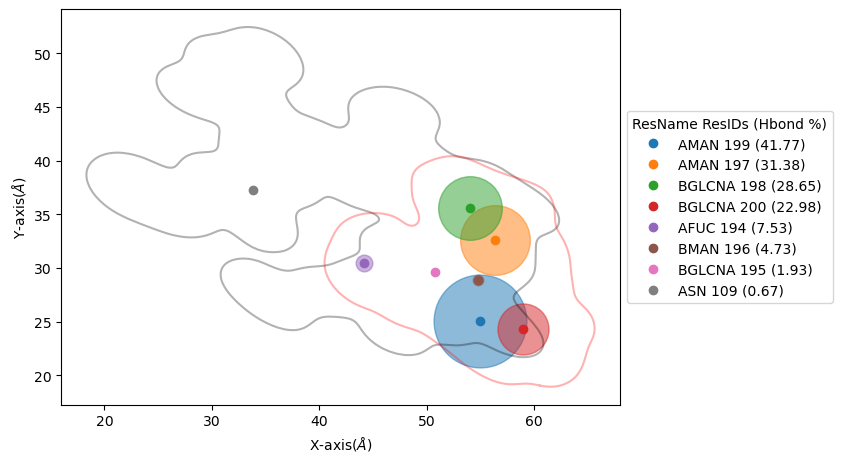

In [35]:
paths=Contact_region.getKDEAnalysis(zlim,Nframes)+glycan.getKDEAnalysis(zlim,Nframes)
ag_biopol.getHbonds('byres (resname DOL and name O1 and prop z > 16)','resid 193-200 or protein', update_selections=False,trj_plot=False)
ag_biopol.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,9],contour_colors=['k','r'],top=10, print_table=True,)
plt.show()

It can be clearly noted that the glycan is the main character in the adsorption.

#### 3. Glycan and Protein 

Now, to further understand the Glycans influence over the proteins dynamics we can compute the Hbonds between the glycan and the protein. Here, we can evidence a particular region of interest of the glycan in the protein, where glycan residues 193 and 195 seem to have preference on forming H-bonds with the protein residues 12-ASN and 39-ASN, respectively.

(1500,)
There are 1500  frames < 15 A in Z
Taking 1000 closest frames to surface...
(1000, 8, 4)
(8000, 4)
There are 10 levels in the KDE.


  0%|          | 0/1500 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname ALA and name O) or (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ARG and name O) or (resname ASN and name ND2) or (resname ASN and name O) or (resname ASN and name OD1) or (resname ASP and name O) or (resname ASP and name OD1) or (resname ASP and name OD2) or (resname CYS and name O) or (resname GLN and name NE2) or (resname GLN and name O) or (resname GLN and name OE1) or (resname GLU and name O) or (resname GLU and name OE1) or (resname GLU and name OE2) or (resname GLY and name O) or (resname HSE and name ND1) or (resname HSE and name O) or (resname ILE and name O) or (resname LEU and name O) or (resname LYS and name O) or (resname PHE and name O) or (resname PRO and name O) or (resname SER and name 

(3, 1321) (1321, 2) resid result
      Frame  Hydrogens  Acceptors
0         0        198         39
1         1         12        193
2         3        195         39
3         4        195         39
4         5        195         39
...     ...        ...        ...
1316   1491        195         39
1317   1492         12        193
1318   1492        195         39
1319   1492        197         39
1320   1496         12        193

[1321 rows x 3 columns]
(3, 1321) (1321, 2) resid result
      Frame  Hydrogens  Acceptors
0         0        198         39
1         1         12        193
2         3        195         39
3         4        195         39
4         5        195         39
...     ...        ...        ...
1278   1491         12        193
1279   1491        195         39
1280   1492         12        193
1281   1492        195         39
1282   1496         12        193

[1283 rows x 3 columns]
Index([11, 32, 33, 34, 37, 38, 39, 41, 104, 192, 193, 194, 195, 196,

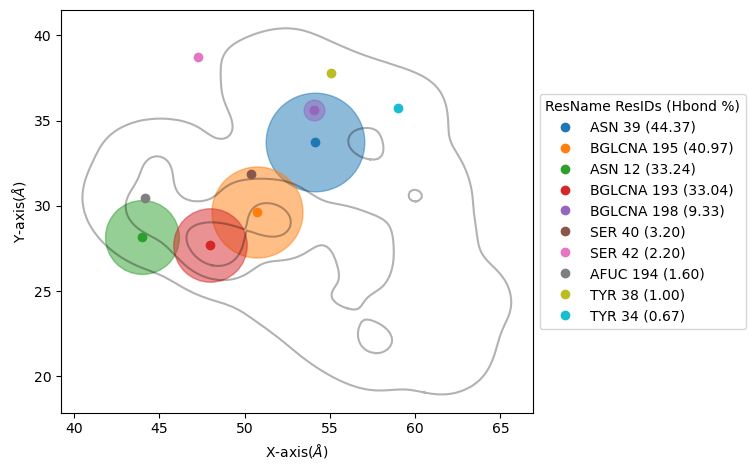

In [36]:

paths=glycan.getKDEAnalysis(zlim,Nframes)
ag_biopol.getHbonds('protein','resid 193-200', update_selections=False,trj_plot=False)
ag_biopol.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,5,8],top=10, print_table=True)
plt.show()

Potentally, you could want to filter some of the residues from the figure. For instance, if we want to see only the protein residues that have Hbonds with the glycan we can filter the glycan residues with `filter` input parameter of the `plotHbondsPerResidues`.

(3, 1321) (1321, 2) resid result
      Frame  Hydrogens  Acceptors
0         0        198         39
1         1         12        193
2         3        195         39
3         4        195         39
4         5        195         39
...     ...        ...        ...
1316   1491        195         39
1317   1492         12        193
1318   1492        195         39
1319   1492        197         39
1320   1496         12        193

[1321 rows x 3 columns]
(3, 1321) (1321, 2) resid result
      Frame  Hydrogens  Acceptors
0         0        198         39
1         1         12        193
2         3        195         39
3         4        195         39
4         5        195         39
...     ...        ...        ...
1278   1491         12        193
1279   1491        195         39
1280   1492         12        193
1281   1492        195         39
1282   1496         12        193

[1283 rows x 3 columns]
Index([11, 32, 33, 34, 37, 38, 39, 41, 104, 192, 193, 194, 195, 196,

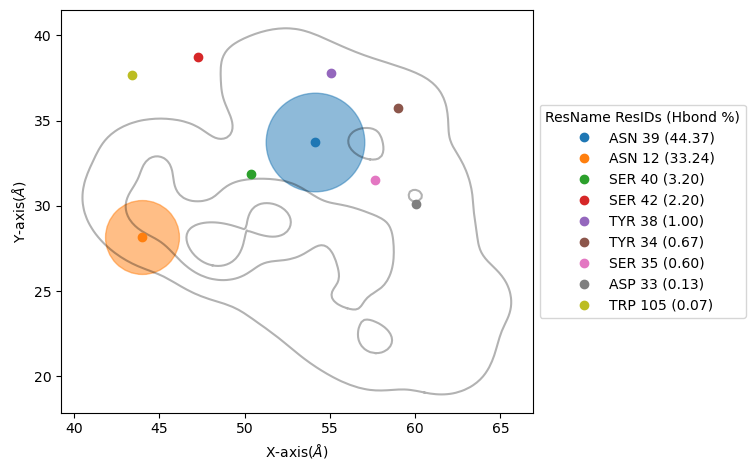

In [37]:
ag_biopol.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,5,8],top=10, print_table=True, filter=['AMAN','BMAN','BGLCNA','AFUC'])
plt.show()

## Conclusion

Using the BioPolymer2D tool we have been able to, not only confirm the flexible nature of the glycan but also gave some insight on the interplay of the glycan in the adsorption of the biopolymer into the surface, and some of the key residues in the adsorption mechanisms. 